<a href="https://colab.research.google.com/github/beatrizliramartins/loans_data/blob/main/Loans_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

In [5]:
#Lendo os dados com pandas

loans = pd.read_csv('loan_data.csv')

In [6]:
# Análise exploratória dos dados

loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


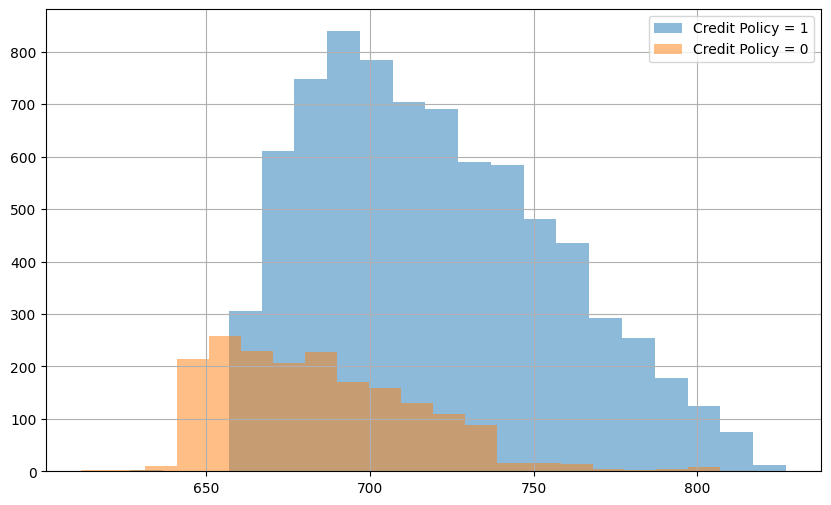

In [7]:
# Distribuição de como está o fico aceito pela plataforma
plt.figure(figsize=(10,6))
loans[loans['credit.policy'] == 1]['fico'].hist(alpha=0.5, bins=20, label='Credit Policy = 1')
loans[loans['credit.policy'] == 0]['fico'].hist(alpha=0.5, bins=20, label='Credit Policy = 0')

plt.legend()



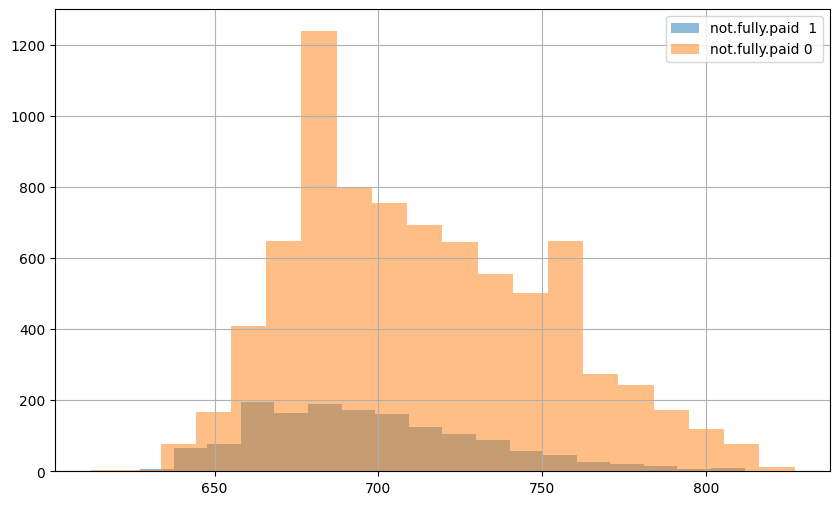

In [8]:
# Olhando agora pela variável "not.fully.paid"

plt.figure(figsize=(10,6))
loans[loans['not.fully.paid'] == 1]['fico'].hist(alpha=0.5, bins=20, label='not.fully.paid  1')
loans[loans['not.fully.paid'] == 0]['fico'].hist(alpha=0.5, bins=20, label='not.fully.paid 0')

plt.legend()


<Axes: xlabel='purpose', ylabel='count'>

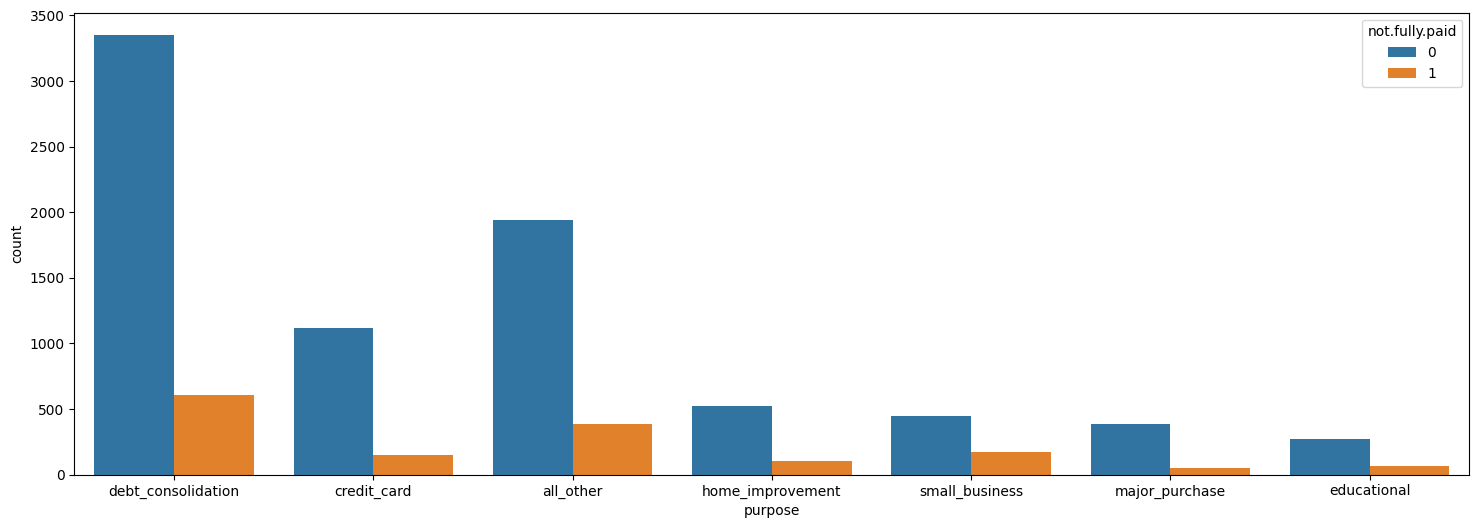

In [9]:
# Contagem de emprestimos por finalidade com matiz de cor "not.fully.paid"

plt.figure(figsize=(18,6))
sns.countplot(x='purpose', hue='not.fully.paid', data=loans)

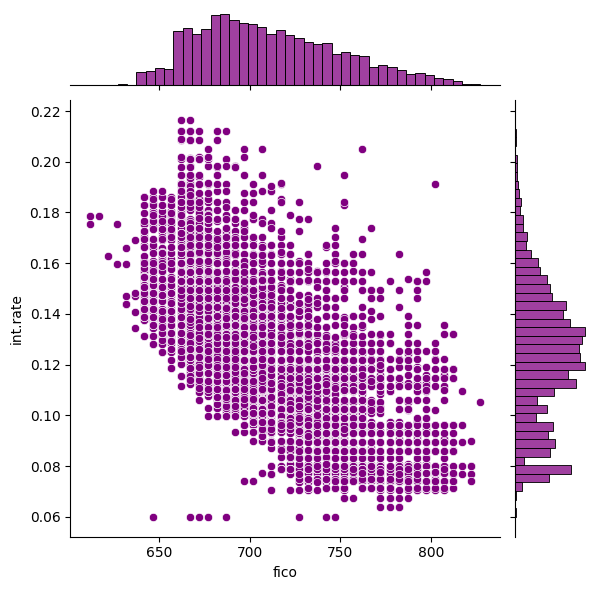

In [10]:
# Tendência entre FICO e TAXA DE JUROS

sns.jointplot(x='fico', y='int.rate', data=loans, color='purple')


<Figure size 1200x600 with 0 Axes>

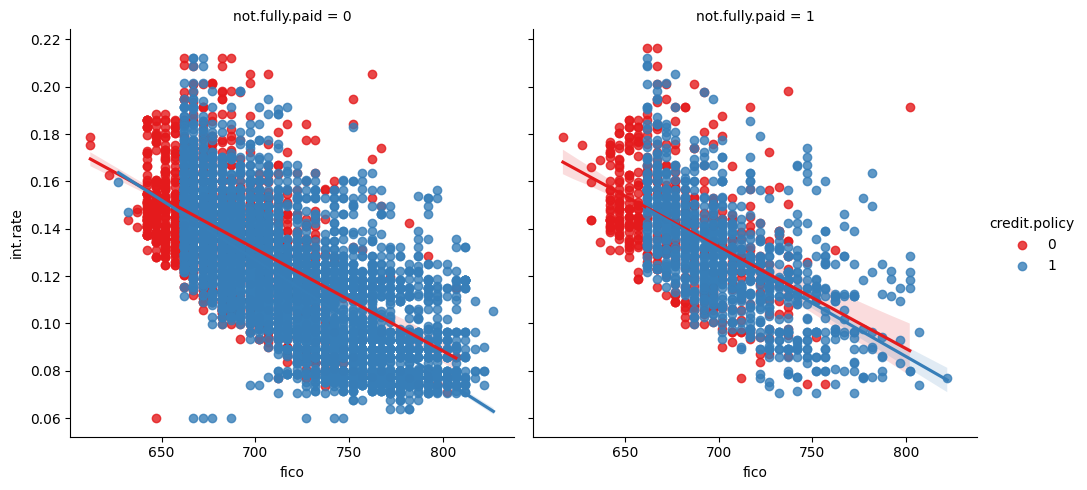

In [11]:
# implots para ver se a tendência deferiu entre "not.fully.paid" e "credit.policy"

plt.figure(figsize=(12,6))
sns.lmplot(x='fico', y='int.rate', data=loans, hue='credit.policy', col='not.fully.paid', palette='Set1')

In [12]:
cat_features = ['purpose']

In [13]:
# Transformando coluna "purpose" em categórica. Isso significa transforma-los usando variáveis dummys

df_final = pd.get_dummies(loans, columns=cat_features, drop_first=True)

In [37]:
# Usando Sklearn

from sklearn.model_selection import train_test_split

In [38]:
# Importando "DecisionTreeClassifer"

X = df_final.drop('not.fully.paid', axis=1)
y = df_final['not.fully.paid']

X_train, X_test, y_test, y_train = train_test_split(X, y, test_size=0.30, random_state=101)

In [39]:
y_train = y_train[:X_train.shape[0]]


In [44]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
#Dividindo os dados por causa do tamanho
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)


DecisionTreeClassifier()

In [47]:
# Comportamento no modelo de previsão

predictions = dtree.predict(X_test)

In [49]:
# Métricas de previsão com matriz de confusão

from sklearn.metrics import classification_report, confusion_matrix

In [50]:
# Plotando o report de classificação

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1611
           1       0.20      0.22      0.21       305

    accuracy                           0.73      1916
   macro avg       0.52      0.52      0.52      1916
weighted avg       0.74      0.73      0.74      1916



In [52]:
# Plotando Matriz de Confusão | Modelo de árvore de decisão de baixa acertividade para o objetivo principal que era descobrir quem realmente não pagou. O modelo acertou a previsão para pessoas que pagaram

print(confusion_matrix(y_test, predictions))

[[1340  271]
 [ 239   66]]


In [53]:
# Usando o Random Forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [54]:
# Previsões e avaliações

predictions = rfc.predict(X_test)

In [55]:
# Plotando o report de classificação | Random Forest

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1611
           1       0.33      0.02      0.03       305

    accuracy                           0.84      1916
   macro avg       0.59      0.51      0.47      1916
weighted avg       0.76      0.84      0.77      1916



In [56]:
# Plotando Matriz de Confusão | Random Forest

print(confusion_matrix(y_test, predictions))

[[1601   10]
 [ 300    5]]
